In [19]:
import uproot
import numpy as np
import matplotlib.pyplot as plt
import awkward as ak

In [7]:
filename = r"C:\Users\lobis\git\FeminosDAQ\examples\events_new_mclient.root"

file = uproot.open(filename)

print(file.keys())

tree = file["EventTree"]

print(tree.keys())

['EventTree;1']
['timestamp', 'event_id', 'signals.id', 'signals.data']


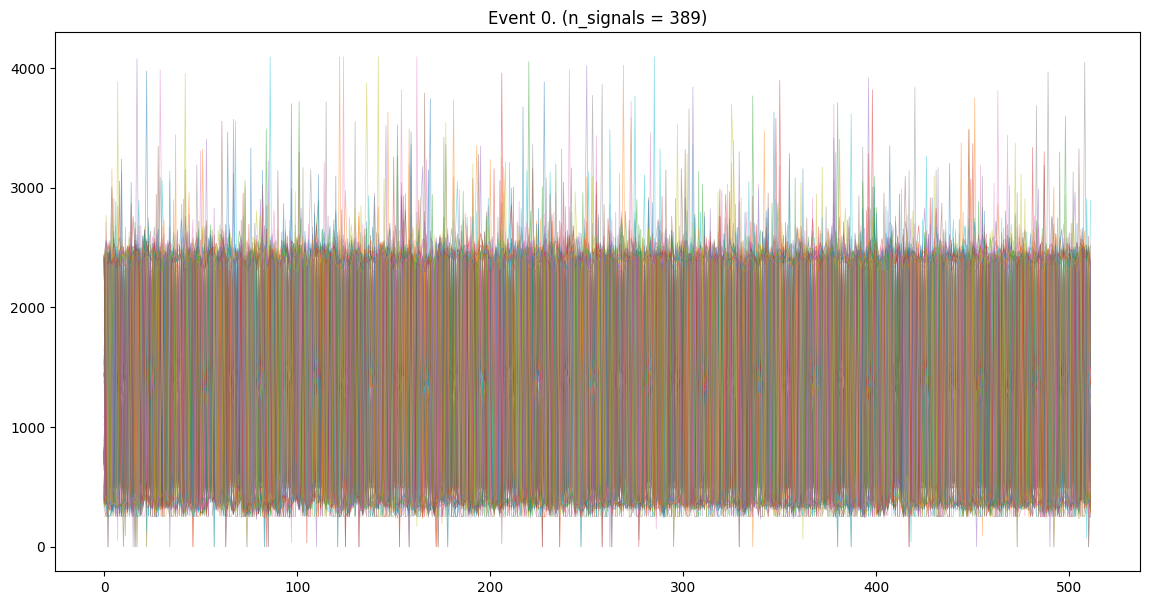

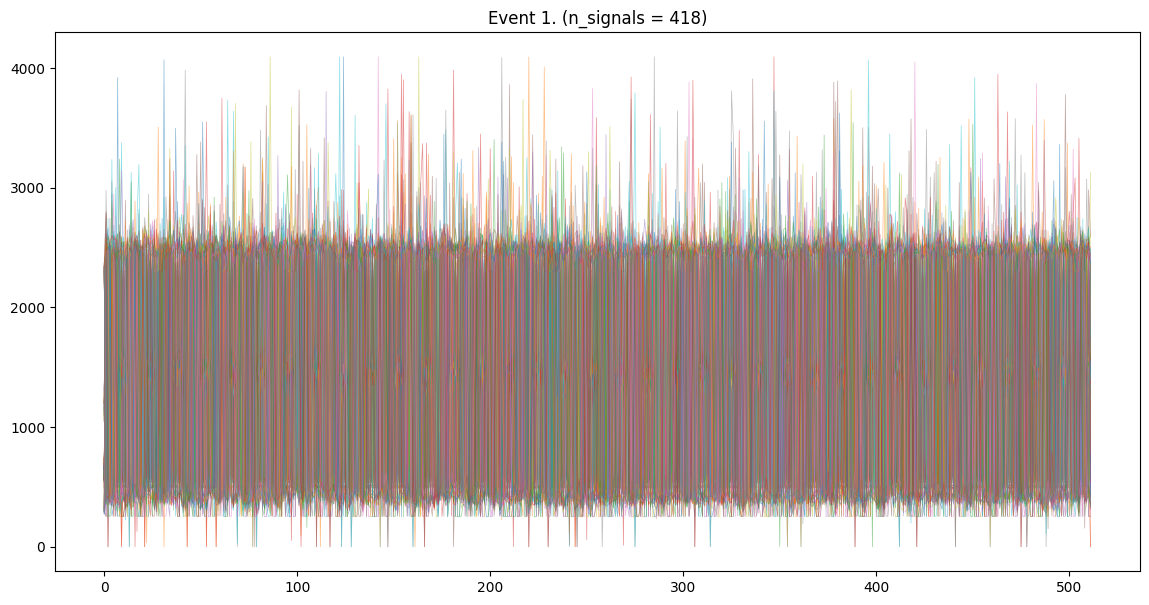

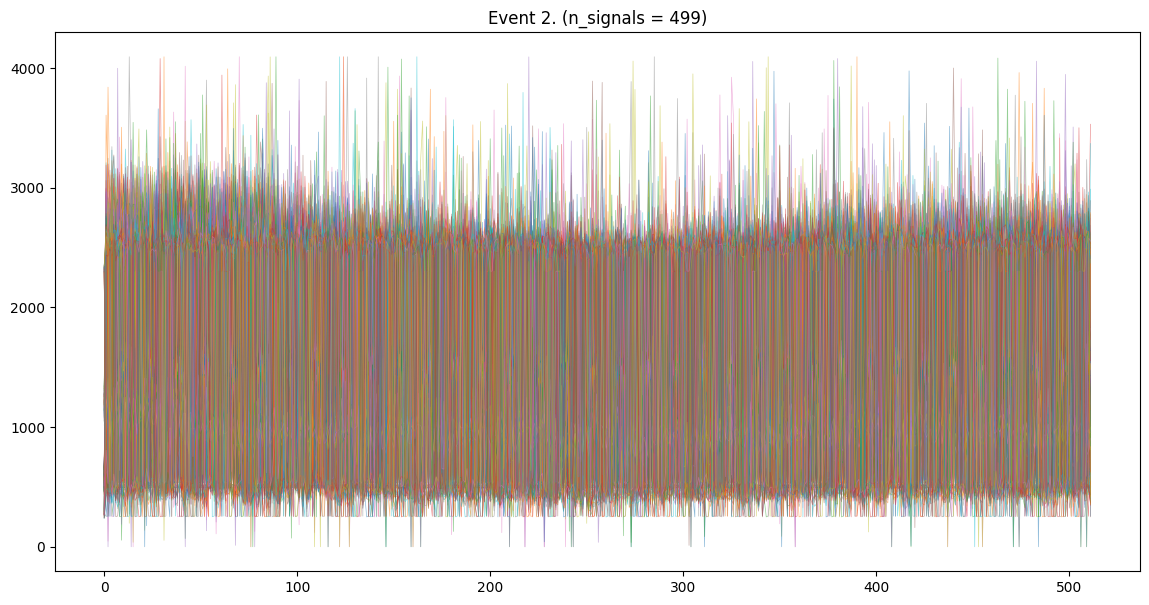

In [244]:
count = 0
n_to_draw = 3

for events in tree.iterate(step_size=5):
    events["signals.data"] = ak.unflatten(events["signals.data"], 512, axis=1)

    # signals is a record with fields 'id' and 'data'
    signals = ak.Array({"id": events["signals.id"], "data": events["signals.data"]})
    events["signals"] = signals

    events = ak.without_field(events, "signals.id")
    events = ak.without_field(events, "signals.data")

    # this section is very slow, but it provides the shape I like. TODO: find a faster way
    # events["signals"] = ak.Array([ak.Array([ak.Record({"id": event.signals.id[i], "data": event.signals.data[i]}) for i in range(len(event.signals.id))]) for event in events], with_name="Signal")

    for event in events:
        plt.figure(figsize=(14, 7))
        # draw all signals
        for id, data in zip(event.signals.id, event.signals.data):
            plt.plot(data, label=f"Signal {id}", alpha=0.5, linewidth=0.5)

        plt.title(f"Event {event.event_id}. (n_signals = {len(event.signals.id)})")
        plt.show()

        count += 1
        
        if count >= n_to_draw:
            break

    if count >= n_to_draw:
        break